In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [5]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [7]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [9]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [10]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [11]:
transactions.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [12]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [13]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [14]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

<AxesSubplot:>

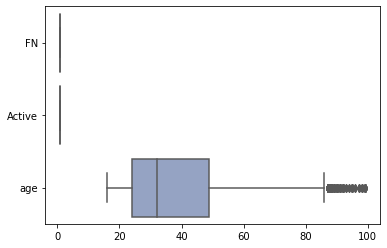

In [15]:
sns.boxplot(data=customers, orient="h", palette="Set2")

<AxesSubplot:>

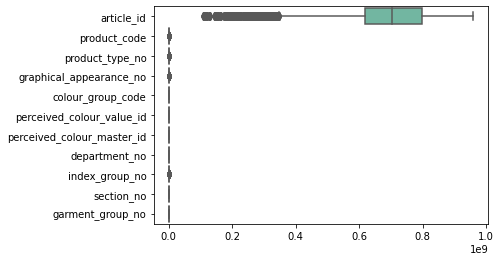

In [16]:
sns.boxplot(data=articles, orient="h", palette="Set2")

<AxesSubplot:>

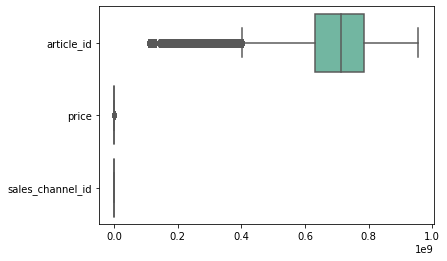

In [17]:
sns.boxplot(data=transactions, orient="h", palette="Set2")

<AxesSubplot:xlabel='age'>

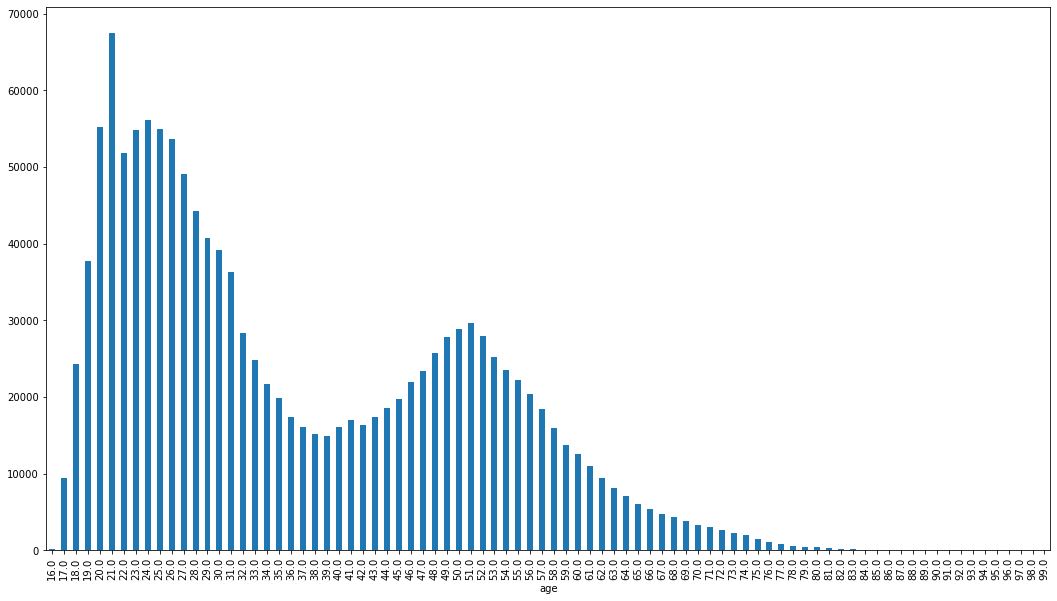

In [54]:
customers.groupby('age').count()['customer_id'].plot(kind='bar', stacked=True, figsize=(18,10))

In [18]:
purch = len(set(transactions.customer_id.values.tolist()))
No_purch = customers.shape[0] - purch
print('the number of purchase is', purch)
print('the number of not purchase is', No_purch)

the number of purchase is 1362281
the number of not purchase is 9699


In [19]:
Top_customer = transactions.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)
Top_customer.head()

,article_id
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237


In [21]:
year_article = transactions.groupby('t_dat').count()[['article_id']]
year_article

,article_id
t_dat,
2018-09-20,48399
2018-09-21,47543
2018-09-22,17635
2018-09-23,52230
2018-09-24,45984
...,...
2020-09-18,39284
2020-09-19,36796
2020-09-20,31489


In [22]:
year_article_asecact = year_article.reset_index().sort_values(['article_id'], ascending=False).head()
year_article_asecact

,t_dat,article_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


In [23]:
year_customers = transactions.groupby('t_dat').count()[['customer_id']]
year_customers

,customer_id
t_dat,
2018-09-20,48399
2018-09-21,47543
2018-09-22,17635
2018-09-23,52230
2018-09-24,45984
...,...
2020-09-18,39284
2020-09-19,36796
2020-09-20,31489


In [24]:
year_customers_asecact = year_customers.reset_index().sort_values(['customer_id'], ascending=False).head()
year_customers_asecact

,t_dat,customer_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


Text(112.75, 0.5, 'Number of Articles')

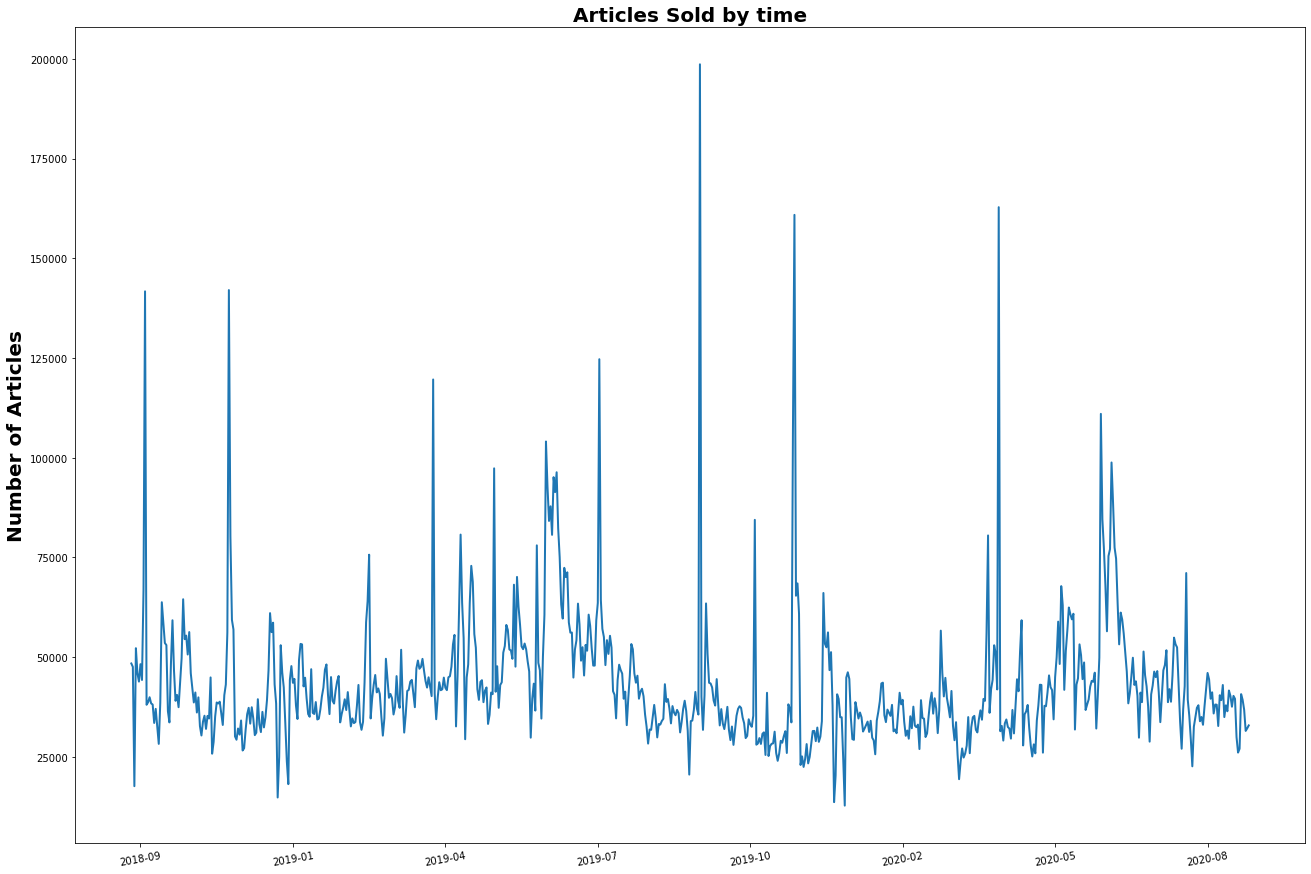

In [25]:
year_article_sold = year_article.reset_index()
year_article_sold['t_dat'] = pd.to_datetime(year_article_sold['t_dat'], format='%Y/%m/%d')
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.plot('t_dat', 'article_id', data = year_article_sold, linewidth=2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation = 10)
plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
tl = ax.set_title('Articles Sold by time',fontsize=20,fontweight = 'bold')
ax.set_ylabel('Number of Articles', fontsize=20,fontweight = 'bold')

In [26]:
df_age = pd.DataFrame(customers, columns = ['customer_id','age'])
total__age_transactions = pd.merge(df_age,transactions, how='right', on='customer_id')
total__age_transactions["age"].fillna(value=0,inplace=True)
total__age_transactions["age"] = total__age_transactions["age"].apply(int)

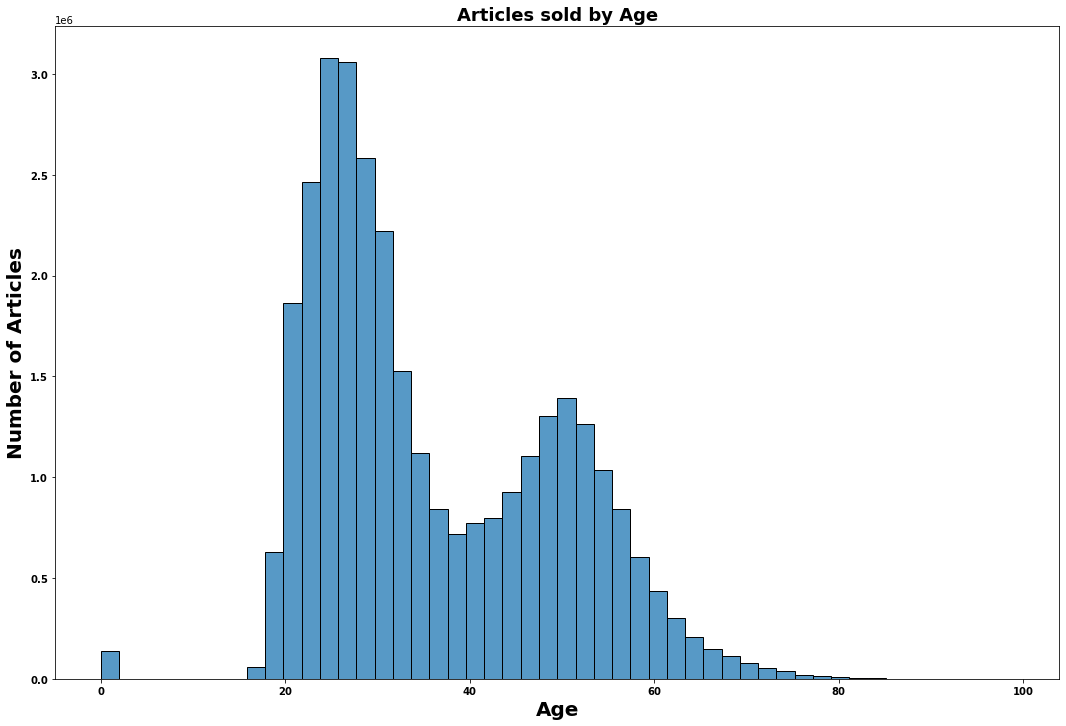

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax = sns.histplot(data = total__age_transactions, x='age',bins=50)
ax.set_ylabel('Number of Articles', fontsize=20, fontweight = 'bold')
ax.set_xlabel('Age', fontsize=20,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
tl = ax.set_title('Articles sold by Age', fontsize=18,fontweight = 'bold')

In [28]:
df_tran_dep= pd.DataFrame(transactions, columns = ['article_id','price'])
df_art_depep=pd.DataFrame(articles, columns = ['article_id'
                                               ,'colour_group_name',
                                               'department_name',
                                               'index_group_name',
                                               'product_group_name'])
department = pd.merge(df_art_depep,df_tran_dep, how='right', on='article_id')
product_pgn = department.groupby(['index_group_name','product_group_name'])['article_id'].count().reset_index()
product_pgn_n = product_pgn.sort_values(['article_id'], ascending=False)
product_pgn_n.head()

,index_group_name,product_group_name,article_id
30,Ladieswear,Garment Upper body,7445565
29,Ladieswear,Garment Lower body,3413376
19,Divided,Garment Upper body,3080490
37,Ladieswear,Swimwear,2475190
18,Divided,Garment Lower body,2418675


[None, None]

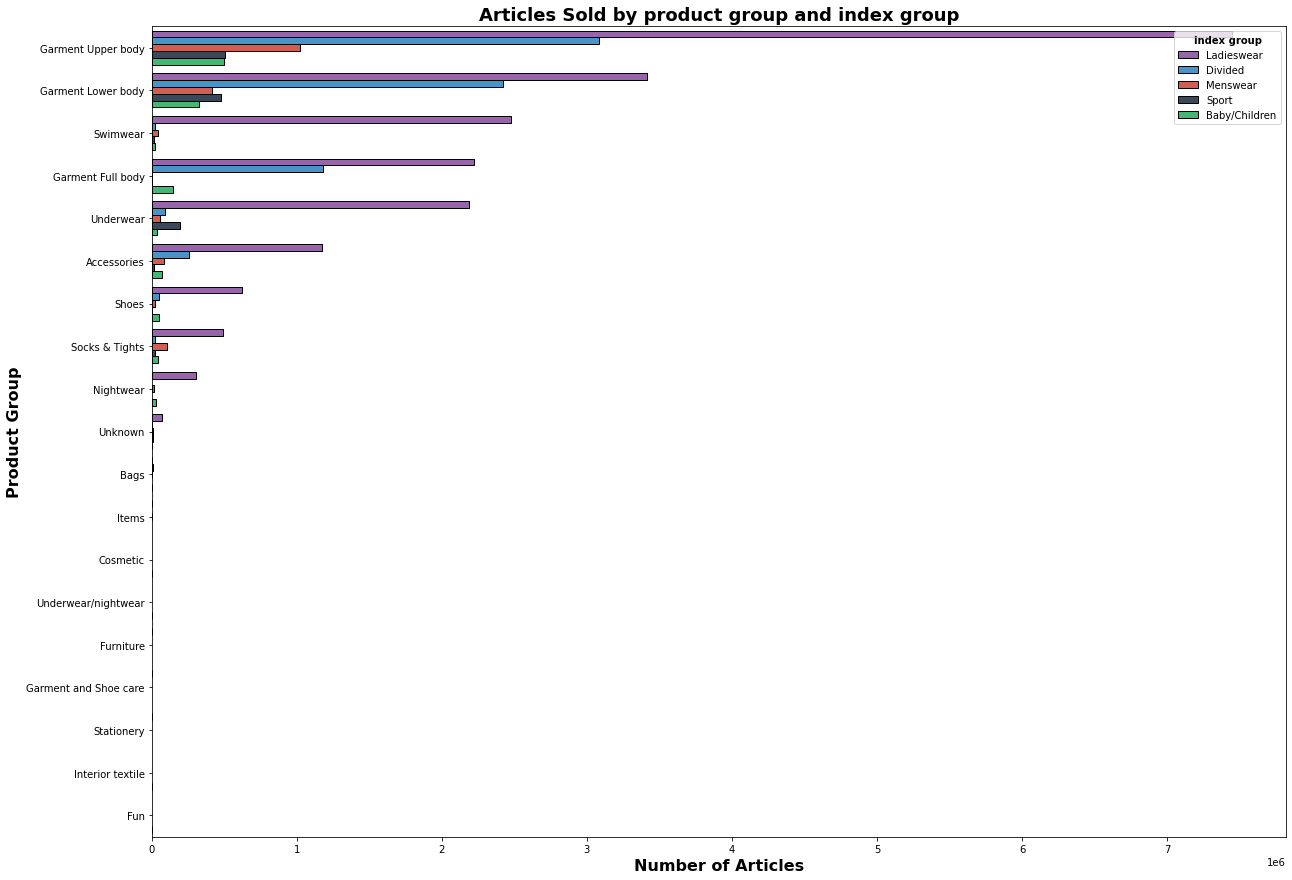

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
flat_color = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]
sns.barplot(data = product_pgn_n,y="product_group_name", x="article_id",
            hue = "index_group_name", palette=flat_color,  edgecolor = 'k', linewidth = 1)
plt.tight_layout()
tl = ax.set_title('Articles Sold by product group and index group',
                   fontsize=18,fontweight = 'bold')
ax.set_ylabel('Product Group', fontsize=16, fontweight = 'bold')
ax.set_xlabel('Number of Articles', fontsize=16,fontweight = 'bold')
legend=plt.legend(title="index group")
plt.setp(legend.get_title(),fontweight = 'bold')

In [30]:
year_pice = transactions.groupby('t_dat').sum()[['price']]
year_pice_amount = year_pice.reset_index()
year_pice_asecact = year_pice_amount.sort_values(['price'], ascending=False).head()
year_pice_asecact

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

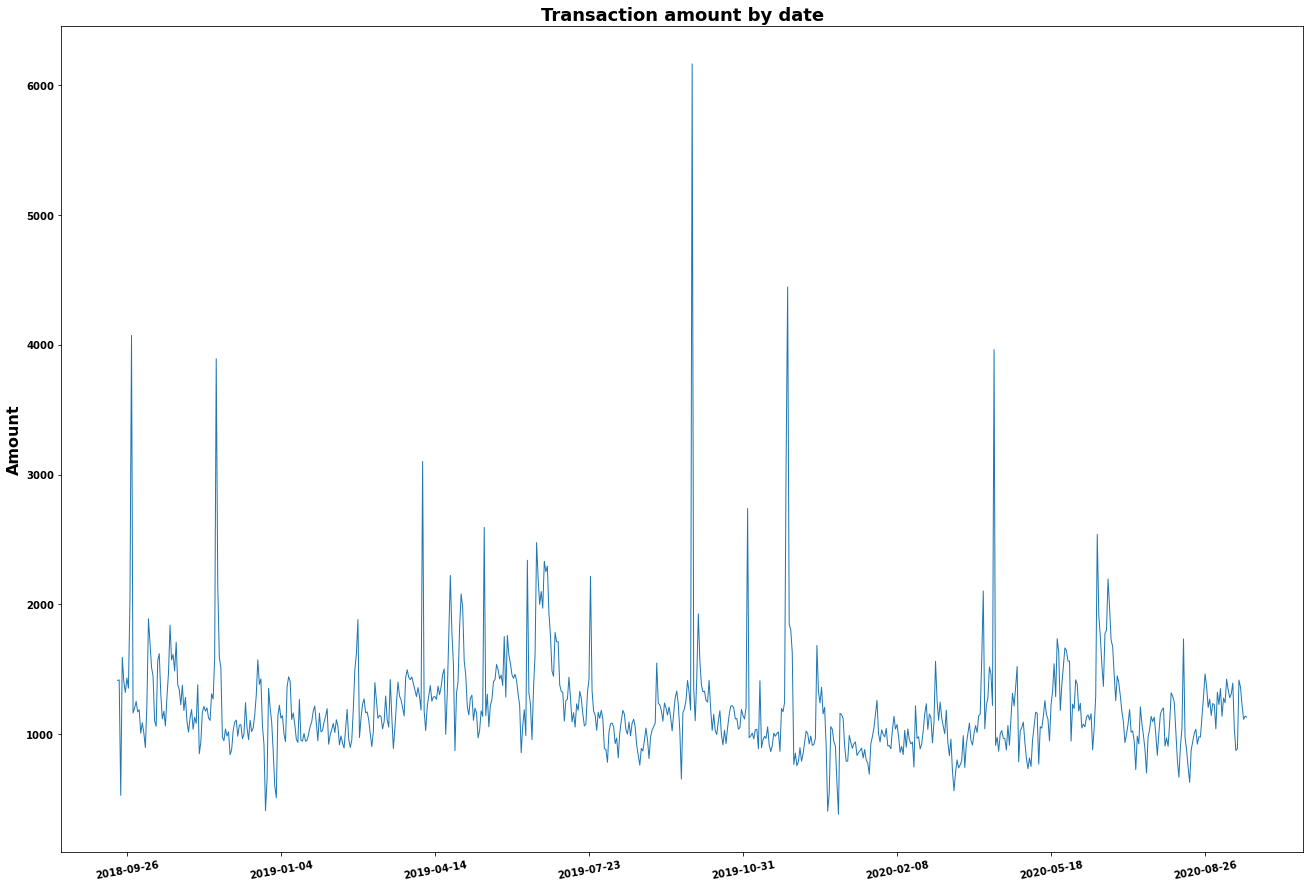

In [31]:
year_pice_amount['t_dat'] = pd.to_datetime(year_pice_amount['t_dat'], format='%Y/%m/%d')
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.plot('t_dat', 'price', data=year_pice_amount, linewidth=1)
plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=10)
tl = ax.set_title('Transaction amount by date', 
                   fontsize=18,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)
ax.set_ylabel('Amount', fontsize=16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

In [32]:
df_cf_cust = pd.DataFrame(customers, columns = ['club_member_status','fashion_news_frequency','customer_id'])
df_cf_tran = pd.DataFrame(transactions, columns = ['customer_id'])

In [33]:
df_cf = pd.merge(df_cf_cust,df_cf_tran, how='right', on='customer_id')

In [34]:
fnf = df_cf.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
fnf1 = fnf.sort_values(['customer_id'], ascending=False)
fnf1.head()

,fashion_news_frequency,customer_id
1,NONE,18029637
3,Regularly,13606657
0,Monthly,10317
2,None,2


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

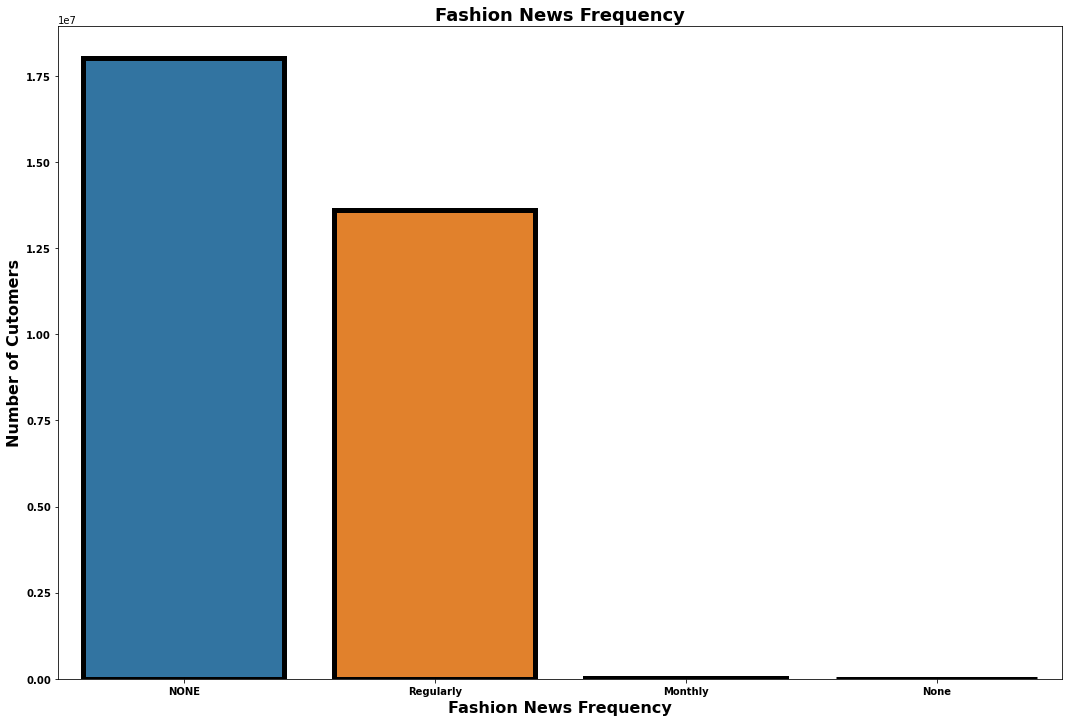

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
sns.barplot(data = fnf1,x="fashion_news_frequency", y="customer_id",
            edgecolor = 'k', linewidth = 5)
tl = ax.set_title('Fashion News Frequency', fontsize=18,fontweight = 'bold')
ax.set_ylabel('Number of Cutomers', fontsize=16, fontweight = 'bold')
ax.set_xlabel('Fashion News Frequency', fontsize=16, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

In [36]:
cms = df_cf.groupby(['club_member_status'])['customer_id'].count().reset_index()
cms1 = cms.sort_values(['customer_id'], ascending=False)
cms1.head()

,club_member_status,customer_id
0,ACTIVE,31057401
2,PRE-CREATE,660219
1,LEFT CLUB,8539


(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000., 35000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

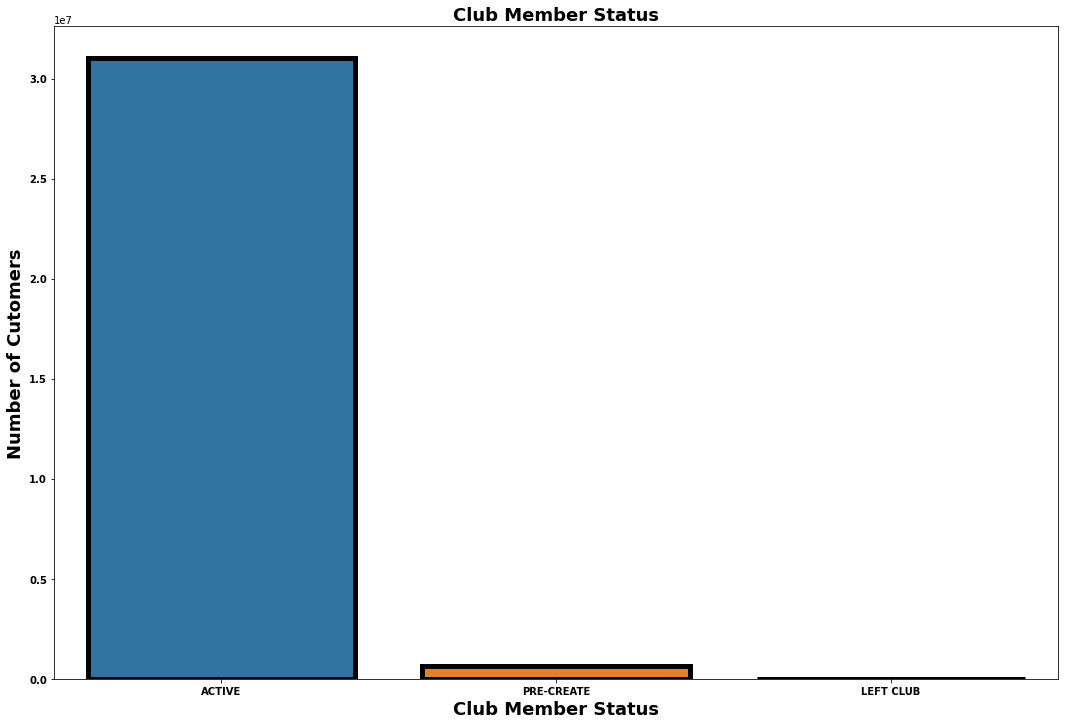

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
sns.barplot(data=cms1,
            x="club_member_status", y="customer_id",
            edgecolor = 'k', linewidth = 5)
tl = ax.set_title('Club Member Status', fontsize=18, fontweight = 'bold')
ax.set_ylabel('Number of Cutomers', fontsize=18,fontweight = 'bold')
ax.set_xlabel('Club Member Status', fontsize=18,fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

In [38]:
df_article = pd.merge(articles,transactions, how='right', on='article_id')


In [39]:
df_article1=df_article.groupby('article_id')[['customer_id']].count().reset_index()
df_article1

,article_id,customer_id
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35


In [40]:
df_article['Total customer'] = df_article1['customer_id']
df_article

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,t_dat,customer_id,price,sales_channel_id,Total customer
0,663713001,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,...,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.050831,2,10841.0
1,541518023,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,1010016,Solid,51,Light Pink,...,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.030492,2,7250.0
2,505221004,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,...,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.015237,2,215.0
3,685687003,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,...,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,1044.0
4,685687004,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,93,Dark Green,...,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31788319,929511001,929511,POPPY PU SHIRT DRESS,265,Dress,Garment Full body,1010001,All over pattern,9,Black,...,53,Divided Collection,1013,Dresses Ladies,Short shirt dress in soft imitation leather wi...,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.059305,2,NaN
31788320,891322004,891322,FENNEL SHIRT DRESS,-1,Unknown,Unknown,1010016,Solid,9,Black,...,53,Divided Collection,1013,Dresses Ladies,Short shirt dress in a cotton weave with a col...,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0.042356,2,NaN
31788321,918325001,918325,Winter shopper,66,Bag,Accessories,1010002,Application/3D,9,Black,...,65,Womens Big accessories,1019,Accessories,"Lightly padded, quilted shopper in a recycled ...",2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0.043203,1,NaN
31788322,833459002,833459,Class Aligator Ring Pack,79,Ring,Accessories,1010016,Solid,3,Silver,...,66,Womens Small accessories,1019,Accessories,Thin metal rings in various designs.,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0.006763,1,NaN


<AxesSubplot:>

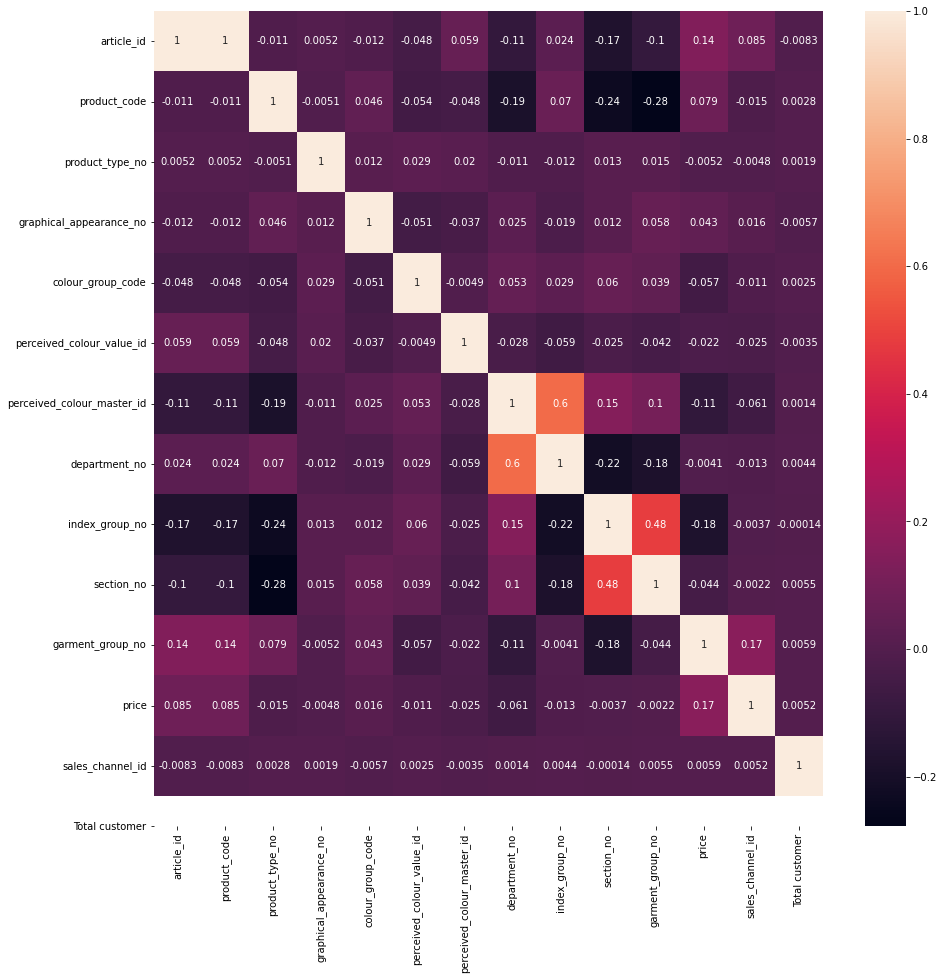

In [41]:
Var_Corr = df_article.corr().drop('article_id')
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

article_id                   -0.008296
product_code                 -0.008296
product_type_no               0.002846
graphical_appearance_no       0.001879
colour_group_code            -0.005693
perceived_colour_value_id     0.002500
perceived_colour_master_id   -0.003452
department_no                 0.001435
index_group_no                0.004419
section_no                   -0.000143
garment_group_no              0.005504
price                         0.005874
sales_channel_id              0.005192
Name: Total customer, dtype: float64


<AxesSubplot:>

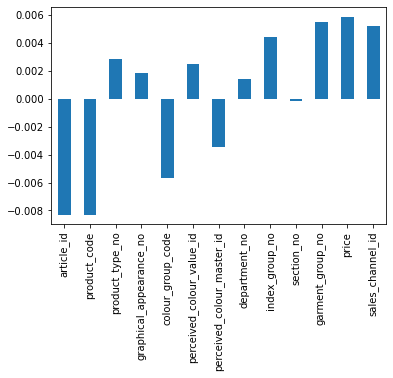

In [42]:
correlations = df_article.corr()['Total customer'].drop('Total customer')
print(correlations)
correlations.plot(kind='bar')